# OVERVIEW

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, plot_confusion_matrix

import pickle

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('max_colwidth', 100)

In [3]:
df = pd.read_csv('Data/Employee Attrition Ready.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,Research & Development,1.0,2,Medical,4,Male,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,Research & Development,6.0,2,Medical,2,Male,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,Sales,7.0,1,Marketing,2,Male,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,Human Resources,NaN,3,Medical,1,Male,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,Research & Development,7.0,4,Life Sciences,2,Male,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,0,18,4,3,8,6,4,0


In [4]:
def summary(df):
    dtype = []
    nan = []
    nan_perc = []
    nunique = []
    unique = []
    
    for i in df.columns:
        dtype.append(df[i].dtype)
        nan.append(df[i].isna().sum())
        nan_perc.append((df[i].isna().sum()/len(df[i]))*100)
        nunique.append(df[i].nunique())
        val_counts = df[i].value_counts(normalize=True)
        unique.append(list(val_counts.index))
    
    summary_df = pd.DataFrame({'dtype': dtype, 'nan' : nan, 'nan_perc' : nan_perc, 'nunique' : nunique, 'unique': unique}, index=df.columns)
    
    return display(summary_df)

In [5]:
summary(df)

,dtype,nan,nan_perc,nunique,unique
Age,float64,136,13.216715,39,"[29.0, 36.0, 34.0, 31.0, 32.0, 33.0, 30.0, 40.0, 38.0, 27.0, 42.0, 41.0, 37.0, 45.0, 39.0, 43.0,..."
Attrition,object,0,0.000000,2,"[No, Yes]"
BusinessTravel,object,5,0.485909,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
Department,object,0,0.000000,3,"[Research & Development, Sales, Human Resources]"
DistanceFromHome,float64,95,9.232264,27,"[1.0, 2.0, 9.0, 10.0, 8.0, 7.0, 4.0, 6.0, 26.0, 16.0, 18.0, 11.0, 25.0, 24.0, 29.0, 12.0, 23.0, ..."
Education,int64,0,0.000000,5,"[3, 4, 2, 1, 5]"
EducationField,object,0,0.000000,6,"[Life Sciences, Medical, Marketing, Technical Degree, Other, Human Resources]"
EnvironmentSatisfaction,int64,0,0.000000,4,"[3, 4, 2, 1]"
Gender,object,0,0.000000,2,"[Male, Female]"
JobInvolvement,int64,0,0.000000,4,"[3, 2, 4, 1]"


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,893.0,37.930571,9.395978,18.0,31.0,37.0,44.0,60.0
DistanceFromHome,934.0,9.930407,8.421791,1.0,2.0,8.0,16.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.0,3.0,3.0,4.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1029.0,2.712342,1.096889,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1029.0,6449.796890,4794.525367,1009.0,2814.0,4735.0,8446.0,19999.0
MonthlyRate,1029.0,14250.629738,7088.757938,2094.0,7950.0,14295.0,20392.0,26999.0
NumCompaniesWorked,1029.0,2.653061,2.508186,0.0,1.0,1.0,4.0,9.0


In [7]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1029,1024,1029,1029,1029,1029,1024,1029
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,853,723,676,426,617,217,474,731


# DATA PREPARATION

In [8]:
num_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
            'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df[num_cols].head(3)

,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,1.0,17399,6615,9,22,32,1,5,4,1,3
1,36.0,6.0,4941,2819,6,20,7,0,3,2,0,1
2,21.0,7.0,2679,4567,1,13,1,3,1,0,1,0


In [9]:
cat_cols = df.select_dtypes(include=[object]).drop('Attrition', axis=1).columns
df[cat_cols].head(3)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Research & Development,Medical,Male,Research Director,Divorced,No
1,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Divorced,No
2,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Single,No


In [10]:
ord_cols = df.select_dtypes(exclude=[object]).drop(num_cols , axis=1).columns
df[ord_cols].head(3)

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,2,4,3,4,4,4,3,1,2
1,2,2,3,2,2,4,4,2,3
2,1,2,3,1,2,3,2,0,3


In [11]:
df['Attrition'] = df['Attrition'].replace({'No' : 0, 'Yes' : 1})
df[['Attrition']].head(3)

,Attrition
0,0
1,0
2,1


__Note :__ Data terbagi menjadi 3 jenis, yaitu kolom numerik, kolom kategori, dan klolom ordinal. Pembagian kelompok data tersebut dilakukan karena setiap kategori memiliki tahapan pre-processing yang berbeda.

# MODELING

Pada tahap modeling, dicoba dengan menggunakan 3 algoritma machine learning yang berbeda, yaitu K-Nearest Neighbor, Random Forest Classifier, dan Gradient Boosting classifier. Skema yang dilakuan untuk mencari machine learning terbaik ialah sebagai berikut.
- Tahap 1 : Membandingkan antara model dengan resampling dengan tanpa resampling di setiap algoritma machine learning.
- Tahap 2 : Membandingkan antara benchmark model dengan hyperparameter tuned model di setiap algortma machine learning.
- Tahap 3 : Membandingkan hasil keluaran terbaik dari ke-3 algoritma machine learning.

Proses modeling dilakukan secara end-to-end menggunakan Pipeline. Di dalam pipeline ini terdapat beberapa tahapan pr-procesing seperti handling missing value, standarisasi (untuk KNN), encoding pada categorical features, feature selection menggunakan RFE (untuk RFC & GBC), dan resampling menggunakan SMOTE (untuk RFC & GBC). Setelah tahap pre-processing, maka model dilatih dengan melakukan prediksi data.

# Data Splitting

In [12]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [13]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=77)

# Benchmark Model Parameters

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(max_depth=10, random_state=77)
gbc = GradientBoostingClassifier(max_depth=10, random_state=77)

# K-Nearest Neighbor Model Performances

> # K-Nearest Neighbor Pipeline

In [15]:
# For numeric columns 
knn_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # For Age & DistanceFromHome
    ('scaler', RobustScaler())
])

# For category nominal columns
knn_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # For BusinessTravel & Maritalstatus
    ('onehot', OneHotEncoder(drop='first')),
])

# Transforming all columns
knn_transformer = ColumnTransformer([
    ('pipe_num', knn_pipe_num, num_cols),
    ('onehot', knn_pipe_cat, cat_cols), 
], remainder='passthrough')

# Combine all pipelines
knn_pipe_all = Pipeline([
    ('transformer', knn_transformer),
    ('knn', knn)
])

# If need resampling
knn_pipe_all_smo = Pipeline([
    ('transformer', knn_transformer),
    ('resampling', SMOTE(random_state=77)),
    ('knn', knn)
])

> ## K-Nearest Neighbor Benchmark Model Performane

In [16]:
skfold = StratifiedKFold(n_splits = 5, random_state=77, shuffle=True)
knn_score = cross_val_score(knn_pipe_all, X_train_val, y_train_val, scoring='recall', cv=skfold, n_jobs=-1)
knn_smo_score = cross_val_score(knn_pipe_all_smo, X_train_val, y_train_val, scoring='recall', cv=skfold, n_jobs=-1)

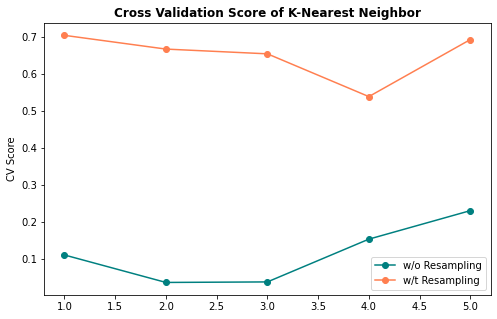

In [109]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,6,1), knn_score, marker='o', color='teal', label='w/o Resampling')
plt.plot(np.arange(1,6,1), knn_smo_score, marker='o', label='w/t Resampling', color='coral')
plt.title('Cross Validation Score of K-Nearest Neighbor', fontweight='bold')
plt.ylabel('CV Score')
plt.legend()
plt.show()

In [18]:
print('CV K-Nearest Neighbor :', knn_score.mean())
print('CV K-Nearest Neighbor Resampling :', knn_smo_score.mean())

CV K-Nearest Neighbor : 0.11424501424501425
CV K-Nearest Neighbor Resampling : 0.6509971509971508


In [19]:
knn_default = knn_pipe_all.fit(X_train_val, y_train_val)
y_pred_knn_default = knn_default.predict(X_test) 

In [20]:
print('Report for K-Nearest Neighbor Benchmark : \n')
print(classification_report(y_test, y_pred_knn_default))

Report for K-Nearest Neighbor Benchmark : 

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       214
           1       0.31      0.09      0.14        44

    accuracy                           0.81       258
   macro avg       0.57      0.52      0.52       258
weighted avg       0.75      0.81      0.76       258



In [21]:
knn_default_smo = knn_pipe_all_smo.fit(X_train_val, y_train_val)
y_pred_knn_default_smo = knn_default_smo.predict(X_test) 

In [22]:
print('Report for K-Nearest Neighbor Benchmark Resampling : \n')
print(classification_report(y_test, y_pred_knn_default_smo))

Report for K-Nearest Neighbor Benchmark Resampling : 

              precision    recall  f1-score   support

           0       0.92      0.57      0.70       214
           1       0.27      0.77      0.40        44

    accuracy                           0.60       258
   macro avg       0.60      0.67      0.55       258
weighted avg       0.81      0.60      0.65       258



__Note :__ Berdasarkan classification report model yang dipilih adalah K-Nearest Neighbor dengan Resampling.

> # K-Nearest Neighbor Hyperparameter Tuned Model Performane

In [23]:
knn_pipe_all_smo.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipe_num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', RobustScaler())]),
                                    ['Age', 'DistanceFromHome', 'MonthlyIncome',
                                     'MonthlyRate', 'NumCompaniesWorked',
                                     'PercentSalaryHike', 'TotalWorkingYears',
                                     'TrainingTimesLastYear', 'YearsAtCompany',
                                     'YearsInCurrentRole',
                                     'YearsSinceLastPromotion',
                                     'YearsWithCurrManager']),
                                   ('onehot',
                                    Pipeline(steps=[('imputer',
                  

In [24]:
knn_params = {
        'knn__n_neighbors': np.arange(3,22,2),
        'knn__weights' : ['uniform', 'distance'],
        'knn__metric' : ['euclidean', 'minkowski', 'manhattan'],
        'knn__leaf_size': np.arange(10,110,10)
}

skfold = StratifiedKFold(n_splits = 5, random_state=77, shuffle=True)

grid_knn = GridSearchCV(
    knn_pipe_all_smo, # model yang mau di tune
    param_grid = knn_params, # hyperparameter option
    cv = skfold, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1,
    verbose = 1
)

grid_knn.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  1.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Age',
                                                                          'DistanceFromHome',
                                                                          'MonthlyIncome',


In [25]:
grid_knn.best_params_

{'knn__leaf_size': 10,
 'knn__metric': 'euclidean',
 'knn__n_neighbors': 17,
 'knn__weights': 'distance'}

In [26]:
knn_tuned = grid_knn.best_estimator_.fit(X_train_val, y_train_val)
y_pred_knn_tuned = knn_tuned.predict(X_test)

In [27]:
print('Report for K-Nearest Neighbor Tuned : \n')
print(classification_report(y_test, y_pred_knn_tuned))

Report for K-Nearest Neighbor Tuned : 

              precision    recall  f1-score   support

           0       0.94      0.47      0.62       214
           1       0.25      0.86      0.39        44

    accuracy                           0.53       258
   macro avg       0.60      0.67      0.51       258
weighted avg       0.83      0.53      0.58       258



__Note :__ Setelah melakukan hyperparameter tuning, terjadi peningkatan nilai Recall dibandingkan Benchmark Model.

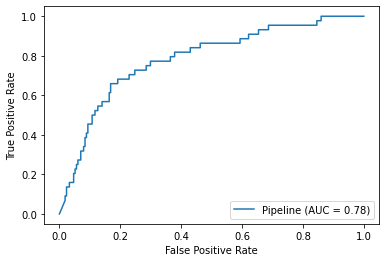

In [28]:
plot_roc_curve(knn_tuned, X_test, y_test)

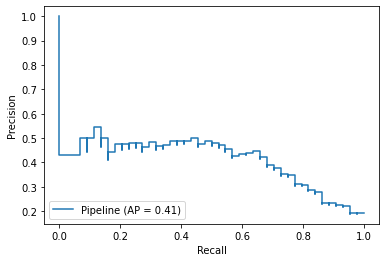

In [29]:
plot_precision_recall_curve(knn_tuned, X_test, y_test)

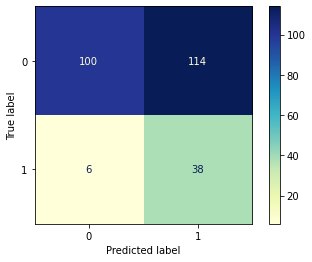

In [30]:
plot_confusion_matrix(knn_tuned, X_test, y_test, cmap='YlGnBu')

In [31]:
def make_confusion_matrix(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    conf_df = pd.DataFrame(
        {'prediction_0': [tn, fn, tn+fn], 'prediction_1': [fp, tp, fp+tp]}, index = ['actual_0', 'actual_1', 'total_prediction']
    )
    conf_df['total_actual'] = conf_df['prediction_0'] + conf_df['prediction_1']
    return conf_df

In [32]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_knn_tuned))

,prediction_0,prediction_1,total_actual
actual_0,100,114,214
actual_1,6,38,44
total_prediction,106,152,258


> # K-Nearest Neighbor Model Improvement
Model improvement merupakan upaya untuk meningkatkan nilai Recall dengan cara menggeser threshold. Model improvement dilakukan pada K-Nearest Neighbor Hyperparameter Tuned Model.

In [33]:
proba_knn = knn_tuned.predict_proba(X_test)
proba_1_knn = proba_knn[:,1]
pr_knn, rc_knn, thrs_knn = precision_recall_curve(y_test, proba_1_knn)
pr_df_knn = pd.DataFrame({'Precision': pr_knn[:-1], 'Recall': rc_knn[:-1], 'Thresholds': thrs_knn})
pr_df_knn

,Precision,Recall,Thresholds
0,0.192982,1.000000,0.283758
1,0.189427,0.977273,0.284352
2,0.190265,0.977273,0.285956
3,0.191111,0.977273,0.287171
4,0.191964,0.977273,0.288143
...,...,...,...
217,0.545455,0.136364,0.941666
218,0.500000,0.113636,0.942349
219,0.444444,0.090909,0.944564
220,0.500000,0.090909,0.945582


In [34]:
pr_df_knn[pr_df_knn['Recall'].between(0.7, 0.87)].sort_values('Precision', ascending=False)

,Precision,Recall,Thresholds
148,0.387500,0.704545,0.663305
147,0.382716,0.704545,0.662342
146,0.378049,0.704545,0.660533
143,0.376471,0.727273,0.649262
145,0.373494,0.704545,0.656962
...,...,...,...
67,0.236025,0.863636,0.463531
66,0.234568,0.863636,0.461982
65,0.233129,0.863636,0.461155
64,0.231707,0.863636,0.460612


              precision    recall  f1-score   support

           0       0.95      0.40      0.56       214
           1       0.23      0.89      0.37        44

    accuracy                           0.48       258
   macro avg       0.59      0.64      0.47       258
weighted avg       0.82      0.48      0.53       258



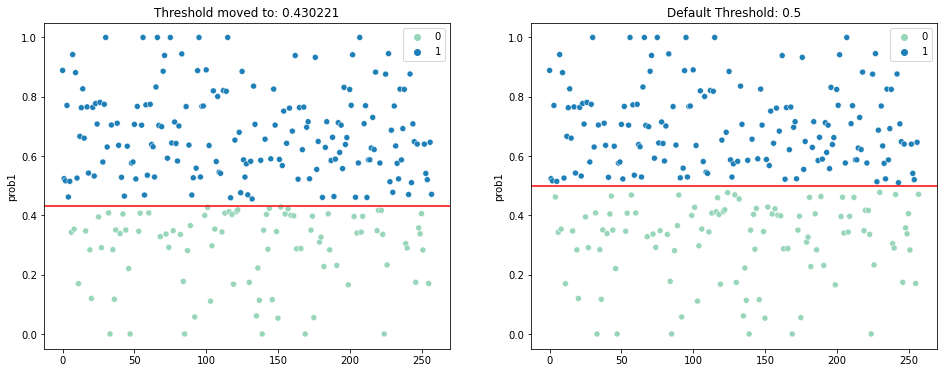

In [35]:
thr_knn = 0.430221
y_pred_thr_knn = np.where(knn_tuned.predict_proba(X_test)[:,1] > thr_knn, 1, 0)
print(classification_report(y_test, y_pred_thr_knn))

thr_knn_df = pd.DataFrame(dict(zip(['label', 'prob1', 'label_043'], [y_pred_thr_knn, knn_tuned.predict_proba(X_test)[:,1], knn_tuned.predict(X_test)])))
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title(f'Threshold moved to: {thr_knn}')
sns.scatterplot(x=thr_knn_df.index, y=thr_knn_df['prob1'], hue=thr_knn_df['label'], palette='YlGnBu')
plt.axhline(thr_knn, color='red')
plt.legend(loc='upper right')

plt.subplot(122)
plt.title('Default Threshold: 0.5')
sns.scatterplot(x=thr_knn_df.index, y=thr_knn_df['prob1'], hue=thr_knn_df['label_043'], palette='YlGnBu')
plt.axhline(0.5, color='red')
plt.legend(loc='upper right')

plt.show()

In [36]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_thr_knn))

,prediction_0,prediction_1,total_actual
actual_0,86,128,214
actual_1,5,39,44
total_prediction,91,167,258


__Note :__ Berdasarkan hasil model improvement untuk K-Nearest Neighbor, didapatkan peningkatan nilai recall. Penggeseran threshold yang dilakukan pun tidak terlalu jauh dari threshold awal, yaitu bergeser menjadi 0,43. Hal tersebut membuat model improvement dapat diterapkan.

# Random Forest Model Performances

> # Random Forest Pipeline

In [37]:
# For numeric columns 
rfc_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')) # For Age & DistanceFromHome
])

# For category nominal columns
rfc_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # For BusinessTravel & Maritalstatus
    ('onehot', OneHotEncoder(drop='first')),
])

# Transforming all columns
rfc_transformer = ColumnTransformer([
    ('pipe_num', rfc_pipe_num, num_cols),
    ('onehot', rfc_pipe_cat, cat_cols), 
], remainder='passthrough')

# Combine all pipelines
rfc_pipe_all = Pipeline([
    ('transformer', rfc_transformer),
    ('rfe', RFE(rfc)),
    ('rfc', rfc)
])

# If need resampling
rfc_pipe_all_smo = Pipeline([
    ('transformer', rfc_transformer),
    ('rfe', RFE(rfc)),
    ('resampling', SMOTE(random_state=77)),
    ('rfc', rfc)
])

> # Random Forest Benchmark Model

In [38]:
skfold = StratifiedKFold(n_splits = 5, random_state=77, shuffle=True)
rfc_score = cross_val_score(rfc_pipe_all, X_train_val, y_train_val, scoring='recall', cv=skfold, n_jobs=-1)
rfc_smo_score = cross_val_score(rfc_pipe_all_smo, X_train_val, y_train_val, scoring='recall', cv=skfold, n_jobs=-1)

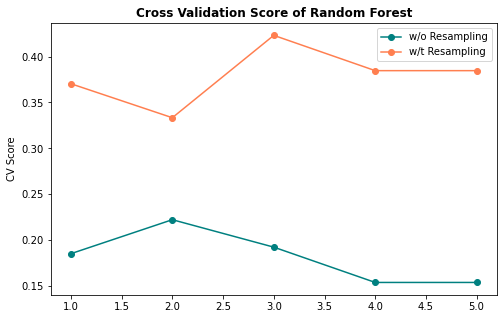

In [110]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,6,1), rfc_score, marker='o', color='teal', label='w/o Resampling')
plt.plot(np.arange(1,6,1), rfc_smo_score, marker='o', label='w/t Resampling', color='coral')
plt.title('Cross Validation Score of Random Forest', fontweight='bold')
plt.ylabel('CV Score')
plt.legend()
plt.show()

In [40]:
print('CV Random Forest :', rfc_score.mean())
print('CV Random Forest Resampling :', rfc_smo_score.mean())

CV Random Forest : 0.1814814814814815
CV Random Forest Resampling : 0.3792022792022792


In [41]:
rfc_default = rfc_pipe_all.fit(X_train_val, y_train_val)
y_pred_rfc_default = rfc_default.predict(X_test)

In [42]:
print('Report for Random Forest Benchmark : \n')
print(classification_report(y_test, y_pred_rfc_default))

Report for Random Forest Benchmark : 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       214
           1       0.71      0.39      0.50        44

    accuracy                           0.87       258
   macro avg       0.80      0.68      0.71       258
weighted avg       0.85      0.87      0.85       258



In [43]:
rfc_default_smo = rfc_pipe_all_smo.fit(X_train_val, y_train_val)
y_pred_rfc_default_smo = rfc_default_smo.predict(X_test)

In [44]:
print('Report for Random Forest Benchmark Resampling : \n')
print(classification_report(y_test, y_pred_rfc_default_smo))

Report for Random Forest Benchmark Resampling : 

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       214
           1       0.55      0.41      0.47        44

    accuracy                           0.84       258
   macro avg       0.71      0.67      0.69       258
weighted avg       0.83      0.84      0.83       258



__Note :__ Berdasarkan classification report model yang dipilih adalah Random Forest dengan Resampling.

> # Random Forest Hyperparameter Tuned Model

In [45]:
rfc_pipe_all_smo.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'Y

In [46]:
rfc_params = {
    'rfc__max_depth': np.arange(6,16,2),
    'rfc__min_samples_split': [200, 300, 400],
    'rfc__min_samples_leaf': [100,150,200],
    'rfc__n_estimators': np.arange(100, 1000, 200)
}

skfold = StratifiedKFold(n_splits = 5, random_state=77, shuffle=True)

grid_rfc = GridSearchCV(
    rfc_pipe_all_smo, # model yang mau di tune
    param_grid = rfc_params, # hyperparameter option
    cv = skfold, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1,
    verbose = 1
)
 
grid_rfc.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed: 52.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Age',
                                                                          'DistanceFromHome',
                                                                          'MonthlyIncome',
                                                                          'MonthlyRate',
                                                                          'NumCompaniesWorked',
                      

In [47]:
grid_rfc.best_params_

{'rfc__max_depth': 6,
 'rfc__min_samples_leaf': 150,
 'rfc__min_samples_split': 400,
 'rfc__n_estimators': 300}

In [48]:
rfc_tuned = grid_rfc.best_estimator_.fit(X_train_val, y_train_val)
y_pred_rfc_tuned = rfc_tuned.predict(X_test)

In [49]:
print('Report for Random Forest Tuned : \n')
print(classification_report(y_test, y_pred_rfc_tuned))

Report for Random Forest Tuned : 

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       214
           1       0.41      0.50      0.45        44

    accuracy                           0.79       258
   macro avg       0.65      0.68      0.66       258
weighted avg       0.81      0.79      0.80       258



__Note :__ Setelah melakukan hyperparameter tuning, terjadi peningkatan nilai Recall dibandingkan Benchmark Model.

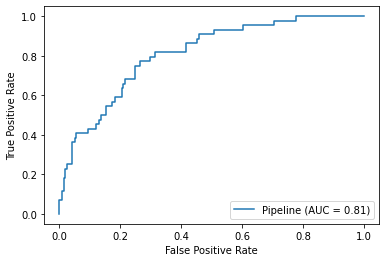

In [50]:
plot_roc_curve(rfc_tuned, X_test, y_test)

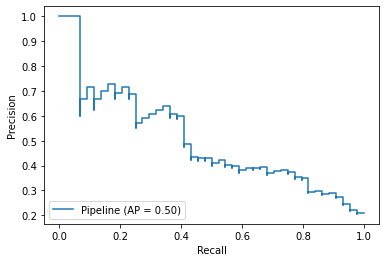

In [51]:
plot_precision_recall_curve(rfc_tuned, X_test, y_test)

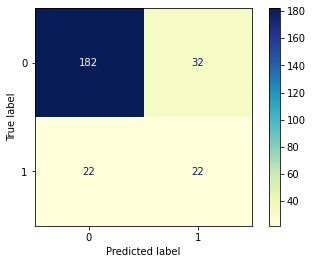

In [52]:
plot_confusion_matrix(rfc_tuned, X_test, y_test, cmap='YlGnBu')

In [53]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_rfc_tuned))

,prediction_0,prediction_1,total_actual
actual_0,182,32,214
actual_1,22,22,44
total_prediction,204,54,258


> # Random Forest Model Improvement
Model improvement merupakan upaya untuk meningkatkan nilai Recall dengan cara menggeser threshold. Model improvement dilakukan pada Random Forest Hyperparameter Tuned Model.

In [54]:
proba_rfc = rfc_tuned.predict_proba(X_test)
proba_1_rfc = proba_rfc[:,1]
pr_rfc, rc_rfc, thrs_rfc = precision_recall_curve(y_test, proba_1_rfc)
pr_rfc_df = pd.DataFrame({'Precision': pr_rfc[:-1], 'Recall': rc_rfc[:-1], 'Thresholds': thrs_rfc})
pr_rfc_df

,Precision,Recall,Thresholds
0,0.209524,1.000000,0.305407
1,0.205742,0.977273,0.306295
2,0.206731,0.977273,0.310957
3,0.207729,0.977273,0.312657
4,0.208738,0.977273,0.315096
...,...,...,...
205,0.600000,0.068182,0.724463
206,0.750000,0.068182,0.733608
207,1.000000,0.068182,0.736697
208,1.000000,0.045455,0.736946


In [55]:
pr_rfc_df[pr_rfc_df['Recall'].between(0.6, 0.85)].sort_values('Precision', ascending=False)

,Precision,Recall,Thresholds
134,0.394737,0.681818,0.465616
136,0.391892,0.659091,0.468474
133,0.389610,0.681818,0.463628
138,0.388889,0.636364,0.469688
135,0.386667,0.659091,0.467271
132,0.384615,0.681818,0.460465
124,0.383721,0.750000,0.453083
137,0.383562,0.636364,0.469230
139,0.380282,0.613636,0.471502
131,0.379747,0.681818,0.458184


              precision    recall  f1-score   support

           0       0.95      0.68      0.79       214
           1       0.35      0.82      0.49        44

    accuracy                           0.71       258
   macro avg       0.65      0.75      0.64       258
weighted avg       0.85      0.71      0.74       258



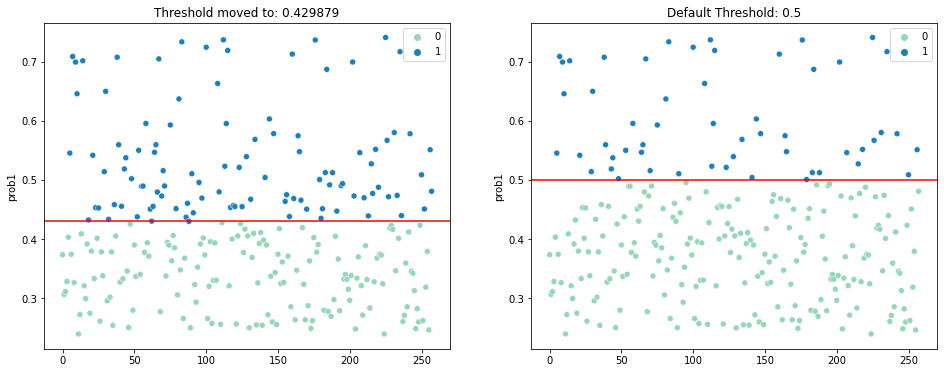

In [56]:
thr_rfc = 0.429879
y_pred_thr_rfc = np.where(rfc_tuned.predict_proba(X_test)[:,1] > thr_rfc, 1, 0)
print(classification_report(y_test, y_pred_thr_rfc))

thr_rfc_df = pd.DataFrame(dict(zip(['label', 'prob1', 'label_043'], [y_pred_thr_rfc, rfc_tuned.predict_proba(X_test)[:,1], rfc_tuned.predict(X_test)])))
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title(f'Threshold moved to: {thr_rfc}')
sns.scatterplot(x=thr_rfc_df.index, y=thr_rfc_df['prob1'], hue=thr_rfc_df['label'], palette='YlGnBu')
plt.axhline(thr_rfc, color='red')
plt.legend(loc='upper right')

plt.subplot(122)
plt.title('Default Threshold: 0.5')
sns.scatterplot(x=thr_rfc_df.index, y=thr_rfc_df['prob1'], hue=thr_rfc_df['label_043'], palette='YlGnBu')
plt.axhline(0.5, color='red')
plt.legend(loc='upper right')

plt.show()

In [57]:
thr_rfc_df

,label,prob1,label_043
0,0,0.373476,0
1,0,0.306295,0
2,0,0.310957,0
3,0,0.328079,0
4,0,0.403122,0
...,...,...,...
253,0,0.318534,0
254,0,0.379078,0
255,0,0.246153,0
256,1,0.551060,1


In [58]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_thr_rfc))

,prediction_0,prediction_1,total_actual
actual_0,146,68,214
actual_1,8,36,44
total_prediction,154,104,258


__Note :__ Berdasarkan hasil model improvement untuk Random Forest, didapatkan peningkatan nilai recall. Penggeseran threshold yang dilakukan pun tidak terlalu jauh dari threshold awal, yaitu bergeser menjadi 0,43. Hal tersebut membuat model improvement dapat diterapkan.

# Gradient Boosting  Model Performances

> # Gradient Boosting Pipeline

In [59]:
# For numeric columns 
gbc_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')) # For Age & DistanceFromHome
])

# For category nominal columns
gbc_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # For BusinessTravel & Maritalstatus
    ('onehot', OneHotEncoder(drop='first')),
])

# Transforming all columns
gbc_transformer = ColumnTransformer([
    ('pipe_num', gbc_pipe_num, num_cols),
    ('onehot', gbc_pipe_cat, cat_cols), 
], remainder='passthrough')

# Combine all pipelines
gbc_pipe_all = Pipeline([
    ('transformer', gbc_transformer),
    ('rfe', RFE(gbc)),
    ('gbc', gbc)
])

# Combine all pipelines
gbc_pipe_all_smo = Pipeline([
    ('transformer', gbc_transformer),
    ('rfe', RFE(gbc)),
    ('resampling', SMOTE(random_state=77)),
    ('gbc', gbc)
])

> # Gradient Boosting Benchmark Model Performance

In [60]:
skfold = StratifiedKFold(n_splits = 5, random_state=77, shuffle=True)
gbc_score = cross_val_score(gbc_pipe_all, X_train_val, y_train_val, scoring='recall', cv=skfold, n_jobs=-1)
gbc_smo_score = cross_val_score(gbc_pipe_all_smo, X_train_val, y_train_val, scoring='recall', cv=skfold, n_jobs=-1)

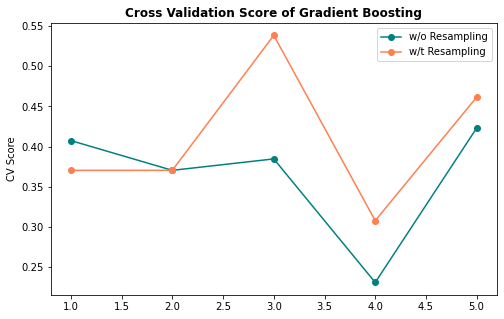

In [112]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,6,1), gbc_score, marker='o', color='teal', label='w/o Resampling')
plt.plot(np.arange(1,6,1), gbc_smo_score, marker='o', label='w/t Resampling', color='coral')
plt.title('Cross Validation Score of Gradient Boosting', fontweight='bold')
plt.ylabel('CV Score')
plt.legend()
plt.show()

In [62]:
print('CV Gradient Boosting :', gbc_score.mean())
print('CV Gradient Boosting Resampling :', gbc_smo_score.mean())

CV Gradient Boosting : 0.36324786324786323
CV Gradient Boosting Resampling : 0.4096866096866097


In [63]:
gbc_default = gbc_pipe_all.fit(X_train_val, y_train_val)
y_pred_gbc_default = gbc_default.predict(X_test) 

In [64]:
print('Report for Gradient Boosting Benchmark : \n')
print(classification_report(y_test, y_pred_gbc_default))

Report for Gradient Boosting Benchmark : 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       214
           1       0.53      0.48      0.50        44

    accuracy                           0.84       258
   macro avg       0.71      0.69      0.70       258
weighted avg       0.83      0.84      0.83       258



In [65]:
gbc_default_smo = gbc_pipe_all_smo.fit(X_train_val, y_train_val)
y_pred_gbc_default_smo = gbc_default_smo.predict(X_test) 

In [66]:
print('Report for Gradient Boosting Resampling : \n')
print(classification_report(y_test, y_pred_gbc_default_smo))

Report for Gradient Boosting Resampling : 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       214
           1       0.39      0.39      0.39        44

    accuracy                           0.79       258
   macro avg       0.63      0.63      0.63       258
weighted avg       0.79      0.79      0.79       258



__Note :__ Berdasarkan classification report model yang dipilih adalah Grradient Boosting tanpa Resampling.

> # Gradient Boosting Hyperparameter Tuned Model Performance

In [67]:
gbc_pipe_all.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipe_num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median'))]),
                                    ['Age', 'DistanceFromHome', 'MonthlyIncome',
                                     'MonthlyRate', 'NumCompaniesWorked',
                                     'PercentSalaryHike', 'TotalWorkingYears',
                                     'TrainingTimesLastYear', 'YearsAtCompany',
                                     'YearsInCurrentRole',
                                     'YearsSinceLastPromotion',
                                     'YearsWithCurrManager']),
                                   ('onehot',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
   

In [68]:
gbc_params = {
    'gbc__learning_rate': [0.1, 0.5],
    'gbc__max_depth' : [6, 8, 10],
    'gbc__min_samples_split': [200, 400],
    'gbc__min_samples_leaf': [75, 100],
    'gbc__n_estimators': [100, 200, 300]
}

skfold = StratifiedKFold(n_splits = 5, random_state=77, shuffle=True)

grid_gbc = GridSearchCV(
    gbc_pipe_all, # model yang mau di tune
    param_grid = gbc_params, # hyperparameter option
    cv = skfold, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1,
    verbose = 1
)

grid_gbc.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 49.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Age',
                                                                          'DistanceFromHome',
                                                                          'MonthlyIncome',
                                                                          'MonthlyRate',
                                                                          'NumCompaniesWorked',
                      

In [69]:
grid_gbc.best_params_

{'gbc__learning_rate': 0.5,
 'gbc__max_depth': 6,
 'gbc__min_samples_leaf': 100,
 'gbc__min_samples_split': 400,
 'gbc__n_estimators': 300}

In [70]:
gbc_tuned = grid_gbc.best_estimator_.fit(X_train_val, y_train_val)
y_pred_gbc_tuned = gbc_tuned.predict(X_test)

In [71]:
print('Report for Gradient Boosting Tuned : \n')
print(classification_report(y_test, y_pred_gbc_tuned))

Report for Gradient Boosting Tuned : 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       214
           1       0.51      0.43      0.47        44

    accuracy                           0.83       258
   macro avg       0.70      0.67      0.69       258
weighted avg       0.82      0.83      0.83       258



__Note :__ Setelah melakukan hyperparameter tuning, terjadi peningkatan nilai Recall dibandingkan Benchmark Model.

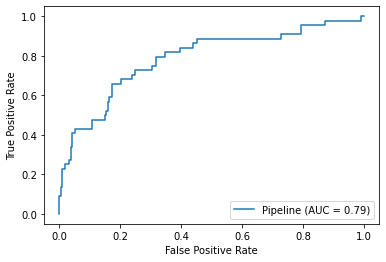

In [72]:
plot_roc_curve(gbc_tuned, X_test, y_test)

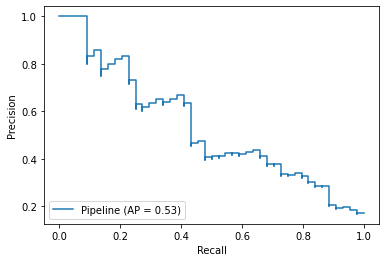

In [73]:
plot_precision_recall_curve(gbc_tuned, X_test, y_test)

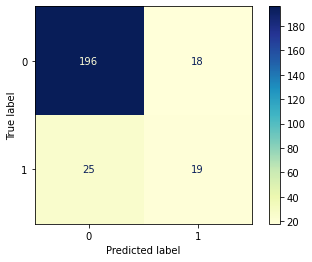

In [74]:
plot_confusion_matrix(gbc_tuned, X_test, y_test, cmap='YlGnBu')

In [75]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_gbc_tuned))

,prediction_0,prediction_1,total_actual
actual_0,196,18,214
actual_1,25,19,44
total_prediction,221,37,258


> # Gradient Boosting Model Improvement 
Model improvement merupakan upaya untuk meningkatkan nilai Recall dengan cara menggeser threshold. Model improvement dilakukan pada Gradient Boosting Hyperparameter Tuned Model.

In [76]:
proba_gbc = gbc_tuned.predict_proba(X_test)
proba_1_gbc = proba_gbc[:,1]
pr_gbc, rc_gbc, thrs_gbc = precision_recall_curve(y_test, proba_1_gbc)
pr_gbc_df = pd.DataFrame({'Precision': pr_gbc[:-1], 'Recall': rc_gbc[:-1], 'Thresholds': thrs_gbc})
pr_gbc_df

,Precision,Recall,Thresholds
0,0.171875,1.000000,0.000025
1,0.168627,0.977273,0.000026
2,0.169291,0.977273,0.000047
3,0.169960,0.977273,0.000047
4,0.170635,0.977273,0.000050
...,...,...,...
251,0.800000,0.090909,0.987901
252,1.000000,0.090909,0.995034
253,1.000000,0.068182,0.995064
254,1.000000,0.045455,0.995577


In [77]:
pr_gbc_df[pr_gbc_df['Recall'].between(0.6, 0.8)].sort_values('Recall', ascending=False)

,Precision,Recall,Thresholds
147,0.321101,0.795455,0.033687
149,0.327103,0.795455,0.035580
150,0.330189,0.795455,0.037882
151,0.333333,0.795455,0.040880
152,0.336538,0.795455,0.041572
153,0.339806,0.795455,0.045146
148,0.324074,0.795455,0.034551
154,0.333333,0.772727,0.045323
157,0.333333,0.750000,0.051231
158,0.336735,0.750000,0.055470


              precision    recall  f1-score   support

           0       0.94      0.65      0.77       214
           1       0.32      0.80      0.46        44

    accuracy                           0.68       258
   macro avg       0.63      0.72      0.61       258
weighted avg       0.83      0.68      0.72       258



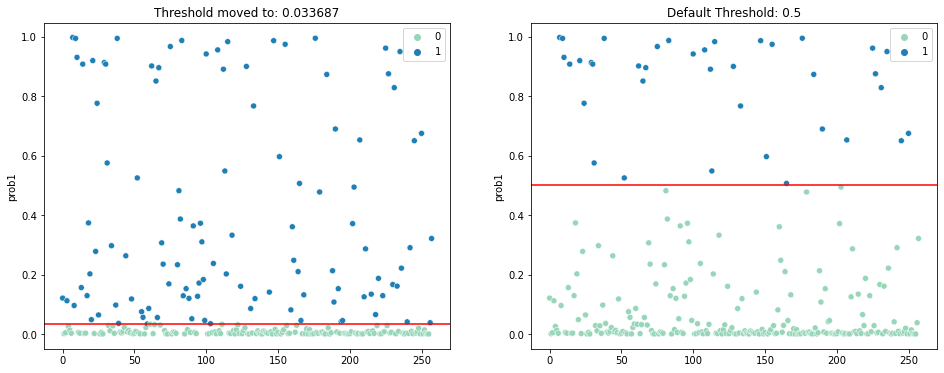

In [78]:
thr_gbc = 0.033687
y_pred_thr_gbc = np.where(gbc_tuned.predict_proba(X_test)[:,1] > thr_gbc, 1, 0)
print(classification_report(y_test, y_pred_thr_gbc))

thr_gbc_df = pd.DataFrame(dict(zip(['label', 'prob1', 'label_003'], [y_pred_thr_gbc, gbc_tuned.predict_proba(X_test)[:,1], gbc_tuned.predict(X_test)])))
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title(f'Threshold moved to: {thr_gbc}')
sns.scatterplot(x=thr_gbc_df.index, y=thr_gbc_df['prob1'], hue=thr_gbc_df['label'], palette='YlGnBu')
plt.axhline(thr_gbc, color='red')
plt.legend(loc='upper right')

plt.subplot(122)
plt.title('Default Threshold: 0.5')
sns.scatterplot(x=thr_gbc_df.index, y=thr_gbc_df['prob1'], hue=thr_gbc_df['label_003'], palette='YlGnBu')
plt.axhline(0.5, color='red')
plt.legend(loc='upper right')

plt.show()

In [79]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_thr_gbc))

,prediction_0,prediction_1,total_actual
actual_0,140,74,214
actual_1,9,35,44
total_prediction,149,109,258


__Note :__ Berdasarkan hasil model improvement untuk Gradient Boosting, didapatkan peningkatan nilai recall. Namun yang disayangkan, untuk mendapatkan nilai Recall yang optimal ini penggeseran threshold sangat jauh dari threshold awal hingga 0,03. Hal tersebut membuat model improvement ini menjadi tidak baik jika digunakan.

# Model Comparison

Pada kasus klasifikasi sendiri terdapat metrics False Positif (FP) dan False Negatif (FN). Dimana, jika diterapkan pada kasus attrition, maka diterjemahkan sebagai berikut :
- FP = Terdapat karyawan yang diprediksi mengundurkan diri, namun sebenarnya akan bertahan.
- FN = Terdapat karyawan yang diprediksi bertahan, namun sebenarnya akan mengundurkan diri.

Berdasarkan metrics tersebut, maka harapan dari model yang dihasilkan dapat __menurunkan jumlah False Negatif (FN)__ dengan scoring yang difokuskan adalah __Recall__. Perusahaan berupaya untuk mencgah karyawan yang akan mengundurkan diri. Karena dengan adanya karyawan mengundurkan diri, maka peruhaan perlu untuk melakukan rekrutmen baru dan pelatihan ulang untuk karyawan baru.

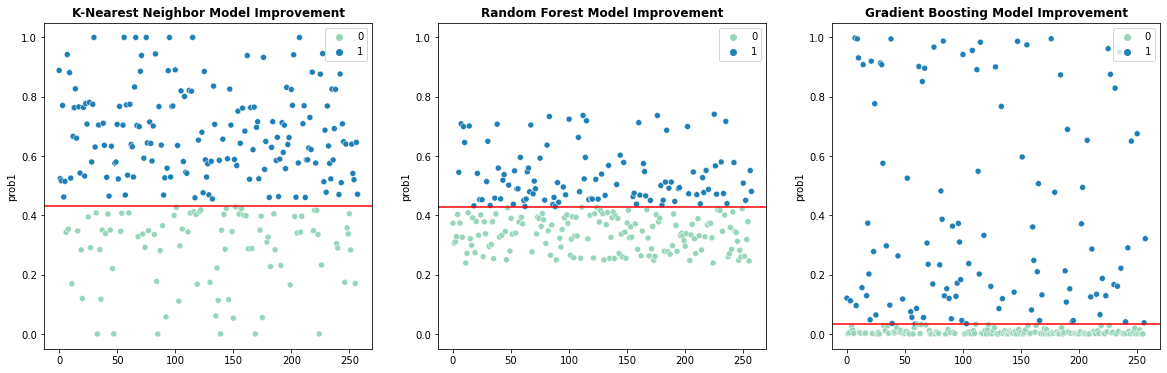

In [80]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.title('K-Nearest Neighbor Model Improvement', fontweight="bold")
sns.scatterplot(x=thr_knn_df.index, y=thr_knn_df['prob1'], hue=thr_knn_df['label'], palette='YlGnBu')
plt.axhline(thr_knn, color='red')
plt.ylim([-0.05, 1.05])
plt.legend(loc='upper right')

plt.subplot(132)
plt.title('Random Forest Model Improvement', fontweight="bold")
sns.scatterplot(x=thr_rfc_df.index, y=thr_rfc_df['prob1'], hue=thr_rfc_df['label'], palette='YlGnBu')
plt.axhline(thr_rfc, color='red')
plt.ylim([-0.05, 1.05])
plt.legend(loc='upper right')

plt.subplot(133)
plt.title('Gradient Boosting Model Improvement', fontweight="bold")
sns.scatterplot(x=thr_gbc_df.index, y=thr_gbc_df['prob1'], hue=thr_gbc_df['label'], palette='YlGnBu')
plt.axhline(thr_gbc, color='red')
plt.ylim([-0.05, 1.05])
plt.legend(loc='upper right')

plt.show()

In [133]:
model_comp = pd.DataFrame({
    "K-Nearest Neighbor": [accuracy_score(y_test, y_pred_thr_knn), 
                           precision_score(y_test, y_pred_thr_knn),
                           recall_score(y_test, y_pred_thr_knn),
                           f1_score(y_test, y_pred_thr_knn)],
    
    "Random Forest": [accuracy_score(y_test, y_pred_thr_rfc),
                      precision_score(y_test, y_pred_thr_rfc),
                      recall_score(y_test, y_pred_thr_rfc),
                      f1_score(y_test, y_pred_thr_rfc)],
    
    "Gradient Boosting": [accuracy_score(y_test, y_pred_thr_gbc),
                  precision_score(y_test, y_pred_thr_gbc),
                  recall_score(y_test, y_pred_thr_gbc),
                  f1_score(y_test, y_pred_thr_gbc),]
    
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])

model_comp

,K-Nearest Neighbor,Random Forest,Gradient Boosting
Accuracy Score,0.484496,0.705426,0.678295
Precision Score,0.233533,0.346154,0.321101
Recall Score,0.886364,0.818182,0.795455
F1 Score,0.369668,0.486486,0.457516


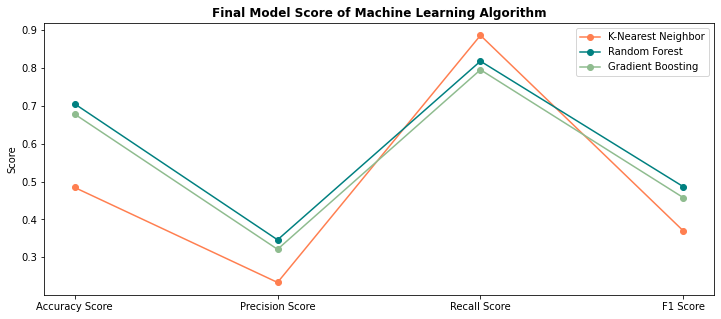

In [136]:
plt.figure(figsize=(12,5))
plt.plot(model_comp.index, model_comp['K-Nearest Neighbor'], marker='o', color='coral', label='K-Nearest Neighbor')
plt.plot(model_comp.index, model_comp['Random Forest'], marker='o', color='teal', label='Random Forest')
plt.plot(model_comp.index, model_comp['Gradient Boosting'], marker='o', color='darkseagreen', label='Gradient Boosting')
plt.title('Final Model Score of Machine Learning Algorithm', fontweight='bold')
plt.ylabel('Score')
plt.legend()
plt.show()

__Note :__ Berdasarkan hasil model yang telah dilakukan dengan menerapkan algoritma machine learning yang berbeda dan juga penerapan optimalisasi score di setiap algoritmanya, maka model yang dipilih untuk dilakukan deployment adalah __Random Forest Classifier__. Dimana, didapatkan  nilai yang cukup baik dengan nilai __Recall sebesar 0,82 dan Akurasi  sebesar 0,7__. Walaupun nilai Recall tersebut lebih rendah dibandingkan yang dihasilkan oleh K_Nearest Neighbor, namun scoring metrics lainnya lebih tollerable, khususnya akurasi.

# MODEL DEPLOYMENT

# Save Model

In [82]:
# rfc_tuned.fit(X,y)
# filename = 'Random_Forest.sav'
# pickle.dump(rfc_tuned, open(filename, 'wb')) 

# New Data Prediction

> # Load Model

In [83]:
filename = 'Random_Forest.sav'
loaded_model = pickle.load((open(filename, 'rb')))

In [84]:
loaded_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                 

> # New Prediction

In [85]:
df_predict = pd.DataFrame({
    'Age' : [25], 
    'BusinessTravel' : 'Travel_Rarely', 
    'Department' : 'Research & Development', 
    'DistanceFromHome' : [2], 
    'Education' : [3],
    'EducationField' : 'Technical Degree', 
    'EnvironmentSatisfaction' : [1], 
    'Gender' : 'Male', 
    'JobInvolvement' : [2],
    'JobLevel' : [2], 
    'JobRole' : 'Laboratory Technician', 
    'JobSatisfaction' : [1], 
    'MaritalStatus' : 'Single',
    'MonthlyIncome' : [1200], 
    'MonthlyRate' : [2100], 
    'NumCompaniesWorked' : [1], 
    'OverTime' : 'Yes',
    'PercentSalaryHike' : [11], 
    'PerformanceRating' : [3], 
    'RelationshipSatisfaction' : [2],
    'StockOptionLevel' : [1], 
    'TotalWorkingYears' : [1], 
    'TrainingTimesLastYear' : [4],
    'WorkLifeBalance' : [3], 
    'YearsAtCompany' : [1], 
    'YearsInCurrentRole' : [1],
    'YearsSinceLastPromotion' : [0], 
    'YearsWithCurrManager' : [1]
})

df_predict

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,25,Travel_Rarely,Research & Development,2,3,Technical Degree,1,Male,2,2,Laboratory Technician,1,Single,1200,2100,1,Yes,11,3,2,1,1,4,3,1,1,0,1


In [86]:
proba_predict = loaded_model.predict_proba(df_predict)
class_predict = np.where(loaded_model.predict_proba(df_predict)[:,1]>thr_rfc, 1, 0)[0]

if class_predict == 0:
    print('Employee might Leave')
else:
    print('Employee might Stay')
    
print(proba_predict)

Employee might Stay
[[0.32089771 0.67910229]]
